# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# DONE: Fill this in based on where you saved the training and testing data

training_file = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
assert(len(X_train) == len(y_train))
n_train = len(X_train)

# TODO: Number of testing examples.
assert(len(X_test) == len(y_test))
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = len(X_test[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

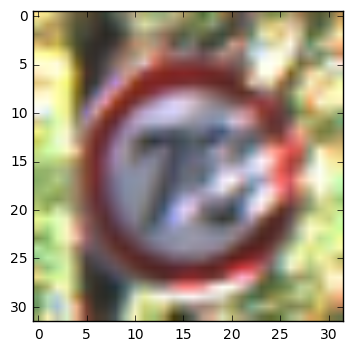

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#plt.imshow(X_train[0])
plt.imshow(X_test[14])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I chose to shuffle the data because that's what we've done in the previous Lab, and it seems fairly straight forward. A simple moving of the data around should suffice to make it random. Also, if i need to pluck a validation set from it after i tweak some parameters, i won't have to go back and change it by hand, because it's randomly shuffled all the data, if i pluck the last 100 for validation, they won't be the same every time, which is a good thing 

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
print(len(X_train))
print(len(y_train))

#X_validate = X_train[:4000].copy()
#y_validate = y_train[:4000].copy()

#X_train = X_train[4001:]
#y_train = y_train[4001:]

from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print(len(X_train))
print(len(y_train))


39209
39209
31367
31367


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Originally I set up my Validation set by taking the first 4000 from my X_train and y_train datasets. I thought this was a good amount because we used roughly 10% in the LeNet Lab for validation. For that method I copied the validation set from the training set, and then I deleted out the 4000 examples from the training sets, so it doesn't know about the exact same images. This can be seen in my commented out code. After reading through the forums I found that other's had used 20-30% of the training set for validation, and the used a utility method from sklearn.model_selection called train_test_split. So I ended up going with 20% of my training set for validation, and using the sklearn utility method to do it. 

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):
    #Hyper params
    mu = 0
    sigma = 0.1
    pad = 'VALID'
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. (increase to more than 6?)
    layer1Weights = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    layer1Biases = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, layer1Weights, strides=[1, 1, 1, 1], padding=pad) + layer1Biases
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=pad)
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    layer2Weights = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    layer2Biases = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, layer2Weights, strides=[1, 1, 1, 1], padding=pad) + layer2Biases
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=pad)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fullyConnected0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fullyConnected1Weights = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fullyConnected1Biases = tf.Variable(tf.zeros(120))
    fullyConnected1 = tf.matmul(fullyConnected0, fullyConnected1Weights) + fullyConnected1Biases
    
    # Activation.
    fullyConnected1 = tf.nn.relu(fullyConnected1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fullyConnected2Weights = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fullyConnected2Biases = tf.Variable(tf.zeros(84))
    fullyConnected2 = tf.matmul(fullyConnected1, fullyConnected2Weights) + fullyConnected2Biases
    
    # Activation.
    fullyConnected2 = tf.nn.relu(fullyConnected2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fullyConnected3Weights = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fullyConnected3Biases = tf.Variable(tf.zeros(43))
    fullyConnected3 = tf.matmul(fullyConnected2, fullyConnected3Weights) + fullyConnected3Biases
    
    return fullyConnected3

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I started off with the LeNet architecture, but changed it to take in a depth of 3 at the start, and then increased the output classes to 43 because in the signnames.csv file there are 0-42 unique labels, hence 43.

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
#parameters
EPOCHS = 15
BATCH_SIZE = 128
learn_rate = 0.0005

#feature and label setup
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#training pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_operation)


In [8]:
#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
#training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    print('training...')
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_validate, y_validate)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

training...

EPOCH 1 ...
Validation Accuracy = 0.417

EPOCH 2 ...
Validation Accuracy = 0.484

EPOCH 3 ...
Validation Accuracy = 0.720

EPOCH 4 ...
Validation Accuracy = 0.665

EPOCH 5 ...
Validation Accuracy = 0.822

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 7 ...
Validation Accuracy = 0.079

EPOCH 8 ...
Validation Accuracy = 0.883

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.911

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.895

EPOCH 13 ...
Validation Accuracy = 0.935

EPOCH 14 ...
Validation Accuracy = 0.879

EPOCH 15 ...
Validation Accuracy = 0.881

Model saved


In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.795


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I started with all the defaults from the LeNet lab. I thought this would be a good baseline to get started, and I was correct. My first training run steadily increased with each Epoch and ended up with 96% validation accuracy. The next day I ran my training again, it did not steadily increase, there were a few ups and downs, but it ended up with 94% accuracy. It was definitely a good baseline to start with, although the learning rate may be a little too large. So, I increased the number of epochs to 15 and turned the learning rate down very slightly to 0.00088 from 0.001. I was still getting a bit of up and down, several scored in the mid 90% range, but it ended with 85%. So I moved the learning rate all the way down to 0.00075, and move back to 10 epochs because 15 was taking little bit longer than I would have liked. This run came out with 93%, but still some up and down. I didn't change the batch size from 128 (default from LeNet), which may be a contributing factor to how long it was taking to run. I settled on a learning rate of 0.0005 and 15 epochs. With the learning rate that small, it provided steady increasing probability with little or no "up and down" in validatin accuracy. I increased the epochs to 15 because it then needed a little more time to get up into the 90% range.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started with the LeNet functionality because it worked very well in the lab, and after my first few training sessions it seemed to be working well there too. I added dropout due the videos claiming that it works "amazingly well". I put it after the first and second activations without changing any other parameters. This resulted in accuracy of about 35%, much poorer than the standard LeNet model. I may have missed some implementation details, but it was a good experiment because I learned how to add dropout, and increased my experience with TensorFlow. It seems that dropout was doing a good job of starting slowly with very low validation accuracy and slowely increasing, if I had more time, and more power I could have definitely spent a lot of time tweaking my architecture with dropout. And hopefully it would have turned out better!

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import numpy as np

image1 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/170px-Keep_right_Portugal_20100107.png'
image2 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/3677862-Speed-limit-sign-in-Germany-Stock-Photo.png'
image3 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/600-03762454em-Stop-Sign-on-Road-Pfalzerwald-Rhineland-Palatinate-Germany.png'
image4 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/autobahn-3.png'
image5 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/autobahn-end-of-restrictions-sign.png'
image6 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/dscf7299.png'
image7 = '/home/carnd/github/CarND-Traffic-Sign-Classifier-Project/street-sign-images/germany-road-sign-construction-works-men-at-work-town-construction-h3xr3c.png'
listOfImages = [image1, image2, image3, image4, image5, image6, image7]

img1 = mpimg.imread(image1)
img2 = mpimg.imread(image2)
img3 = mpimg.imread(image3)
img4 = mpimg.imread(image4)
img5 = mpimg.imread(image5)
img6 = mpimg.imread(image6)
img7 = mpimg.imread(image7)
listOfImagesInBytes = [img1, img2, img3, img4, img5, img6, img7]

In [ ]:
from IPython.display import Image
from IPython.display import display

for im in listOfImages:
    x1 = Image(filename=im)
    display(x1)

In [ ]:
pickle_file = 'notMNIST.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('notMNIST.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'my_test_dataset': my_test_features,
                    'my_test_labels': train_labels
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Some of the pictures actually have watermarks on them, I think that may make it a little more difficult because the sign then has extra writing over top of the sign. This could be a good test because sometimes signs in real life have graffiti on them.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.